## Домашние задание №2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [4]:

X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])  # квалификация репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]    # средний балл ЕГЭ (целевая переменная)
n = X.shape[1]

### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).  

In [5]:
# Стандартизируем признаки
X_st = X.copy()
X_st = X_st.astype(np.float64)

for i in range(1, 4):
    X_st[i] = (X_st[i] - X_st[i].mean()) / X_st[i].std()

# Напишем функцию градиентного спуска с L2 решуляризацией
def eval_model_reg2(X, y, iterations, lambda_, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W) 
    return W

In [6]:
# Получим коэффициенты при разных lambda
W_all = []
for i in (1, 0.1, 0.005, 0.0001):
    W_all.append(list(eval_model_reg2(X_st, y, iterations=1000, alpha=1e-3, lambda_= i)))

W_all_2 = pd.DataFrame(W_all, columns = ("w_0", "w_1", "w_2", "w_3"))

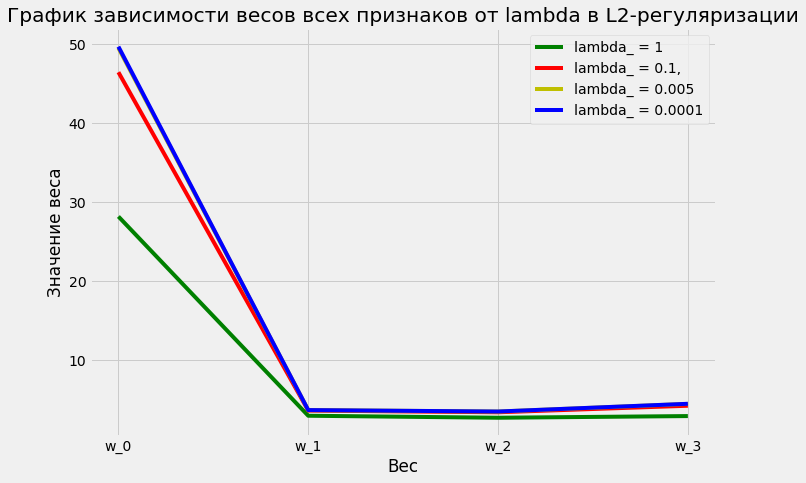

In [7]:
# Нарисуем график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 7))
color = ["g","r","y","b"]
label = ["lambda_ = 1", "lambda_ = 0.1,", "lambda_ = 0.005", "lambda_ = 0.0001"]
for i in range(4):
    plt.plot(W_all_2.loc[i], color = color[i], label=label[i])
    plt.xlabel('Вес')
    plt.ylabel('Значение веса')
    plt.title("График зависимости весов всех признаков от lambda в L2-регуляризации")
    plt.legend()

### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  

In [8]:
n = X.shape[1]
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000]])
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]    # средний балл ЕГЭ (целевая переменная)

Посмотрим на коэффициенты и MSE до масштабирования

In [9]:
w = np.linalg.inv(X @ X.T) @ X @ y
w

array([4.25569284e+01, 2.62631471e+00, 8.22015726e-03])

In [10]:
y_pred = np.dot(w, X)
calc_mse(y, y_pred)

42.983380986418894

Попробуем последовательно применить стачало нормализацию, а затем стандатризацию. Потом, наоборот и посмотрим, что будет происходить с данными, коэффициенами и ошибкой обучения.

#### Проведем нормализацию исходных признаков

In [11]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03]])

In [12]:
X_norm[1] = (X_norm[1] - X_norm[1].min()) / (X_norm[1].max() - X_norm[1].min())
X_norm[1]

array([0.1, 0.1, 0.2, 0.1, 0.3, 0. , 0.5, 1. , 0.1, 0.2])

In [13]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm[2]

array([0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
       0.22580645, 0.67741935, 1.        , 0.        , 0.35483871])

In [14]:
X_norm[2] = (X_norm[2] - X_norm[2].min()) / (X_norm[2].max() - X_norm[2].min())
X_norm[2]

array([0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
       0.22580645, 0.67741935, 1.        , 0.        , 0.35483871])

In [15]:
X_norm[1] = (X_norm[1] - X_norm[1].min()) / (X_norm[1].max() - X_norm[1].min())
X_norm[1]

array([0.1, 0.1, 0.2, 0.1, 0.3, 0. , 0.5, 1. , 0.1, 0.2])

In [16]:
w_norm = np.linalg.inv(X_norm @ X_norm.T) @ X_norm @ y
print(f"Коэффициенты после нормализаци исходных признаков: {w_norm}")
y_pred = np.dot(w_norm, X_norm)
print(f"MSE после нормализаци исходных признаков: {calc_mse(y, y_pred)}")

Коэффициенты после нормализаци исходных признаков: [46.25599918 26.26314715 12.74124375]
MSE после нормализаци исходных признаков: 42.98338098641885


#### Проведем стандартизацию нормализованнных признаков

In [17]:
X_norm_st = X_norm.copy().astype(np.float64)
X_norm_st[1] = (X_norm_st[1] - X_norm_st[1].mean()) / X_norm_st[1].std()
X_norm_st[1]

array([-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
       -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571])

In [18]:
X_norm_st[2] = (X_norm_st[2] - X_norm_st[2].mean()) / X_norm_st[2].std()
X_norm_st[2]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

In [19]:
w_norm_st = np.linalg.inv(X_norm_st @ X_norm_st.T) @ X_norm_st @ y
print(f"Коэффициенты после стандартизации нормализованнных признаков: {w_norm_st}")
y_pred = np.dot(w_norm_st, X_norm_st)
print(f"MSE после стандартизации нормализованнных признаков: {calc_mse(y, y_pred)}")

Коэффициенты после стандартизации нормализованнных признаков: [57.4         7.3536812   3.98592874]
MSE после стандартизации нормализованнных признаков: 42.98338098641888


#### Теперь проведем масштабирование в обратном порядке

#### Проведем стандартизацию исходных признаков

In [20]:
X_st = X.copy()
X_st = X_st.astype(np.float64)
X_st

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03]])

In [21]:
X_st[1] = (X_st[1] - X_st[1].mean()) / X_st[1].std()
X_st[1]

array([-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
       -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571])

In [22]:
X_st[2] = (X_st[2] - X_st[2].mean()) / X_st[2].std()
X_st[2]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

In [23]:
w_st = np.linalg.inv(X_st @ X_st.T) @ X_st @ y
print(f"Коэффициенты после стандартизацию исходных признаков: {w_st}")
y_pred = np.dot(w_st, X_st)
print(f"MSE после w_norm_st: {calc_mse(y, y_pred)}")

Коэффициенты после стандартизацию исходных признаков: [57.4         7.3536812   3.98592874]
MSE после w_norm_st: 42.98338098641888


#### Проведем нормализацию стандартизированных признаков

In [24]:
X_st_norm = X_st.copy()
X_st_norm

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735]])

In [25]:
X_st_norm[1] = (X_st_norm[1] - X_st_norm[1].min()) / (X_st_norm[1].max() - X_st_norm[1].min())
X_st_norm[1]

array([0.1, 0.1, 0.2, 0.1, 0.3, 0. , 0.5, 1. , 0.1, 0.2])

In [26]:
X_st_norm[2] = (X_st_norm[2] - X_st_norm[2].min()) / (X_st_norm[2].max() - X_st_norm[2].min())
X_st_norm[2]

array([0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
       0.22580645, 0.67741935, 1.        , 0.        , 0.35483871])

In [27]:
w_st_norm = np.linalg.inv(X_st_norm @ X_st_norm.T) @ X_st_norm @ y
print(f"Коэффициенты после нормализации стандартизированных признаков: {w_st_norm}")
y_pred = np.dot(w_st_norm, X_st_norm)
print(f"MSE после нормализации стандартизированных признаков: {calc_mse(y, y_pred)}")

Коэффициенты после нормализации стандартизированных признаков: [46.25599918 26.26314715 12.74124375]
MSE после нормализации стандартизированных признаков: 42.98338098641885


Сравним коэффициенты при разных комбинациях масштабирования

In [28]:
print(f"Коэффициенты после нормализаци исходных признаков: {w_norm}")
print(f"Коэффициенты после нормализации стандартизированных признаков: {w_st_norm}")
print(f"Коэффициенты после стандартизацию исходных признаков: {w_st}")
print(f"Коэффициенты после стандартизации нормализованнных признаков: {w_norm_st}")

Коэффициенты после нормализаци исходных признаков: [46.25599918 26.26314715 12.74124375]
Коэффициенты после нормализации стандартизированных признаков: [46.25599918 26.26314715 12.74124375]
Коэффициенты после стандартизацию исходных признаков: [57.4         7.3536812   3.98592874]
Коэффициенты после стандартизации нормализованнных признаков: [57.4         7.3536812   3.98592874]


Сравним признаки при разных комбинациях масштабирования

In [29]:
print(X_norm[2])
print(X_st_norm[2])
print(X_norm_st[2])
print(X_st[2])

[0.03225806 0.16129032 0.19354839 0.09677419 0.64516129 0.22580645
 0.67741935 1.         0.         0.35483871]
[0.03225806 0.16129032 0.19354839 0.09677419 0.64516129 0.22580645
 0.67741935 1.         0.         0.35483871]
[-0.97958969 -0.56713087 -0.46401617 -0.77336028  0.97958969 -0.36090146
  1.08270439  2.11385144 -1.08270439  0.05155735]
[-0.97958969 -0.56713087 -0.46401617 -0.77336028  0.97958969 -0.36090146
  1.08270439  2.11385144 -1.08270439  0.05155735]


##### Вывод
Смысла в одновременом применении нормализации и стандартизации нет, так как после нормализации стандартизированных признаков мы получаем те же признаки, что и после нормализации исходных признаков. Тот же принцип действует и в обратном случае. После стандартизации нормализизированных призаков, мы получаем теже признаки, что и после стандартизации исходных. Поэтому нужно просто применять либо нормализацию либо стандартизацию.

### 3. *Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [186]:
n = X.shape[1]
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])  # квалификация репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]    # средний балл ЕГЭ (целевая переменная)

In [187]:
# Стандартизируем признаки
X_st = X.copy()
X_st = X_st.astype(np.float64)

for i in range(1, 4):
    X_st[i] = (X_st[i] - X_st[i].mean()) / X_st[i].std()

# Напишем функцию градиентного спуска с L1 регуляризацией
def eval_model_reg1(X, y, iterations, lambda_, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
    return W

In [188]:
# Посчитаем коэффициенты
w_L1 = eval_model_reg1(X_st, y, iterations=10000, alpha=1e-3, lambda_= 0.001)

In [189]:
# Посчитаем MSE
y_pred = np.dot(w_L1, X_st)
calc_mse(y, y_pred)

39.80711256982036

### 4. *Сравните на графиках изменение весов признаков от lambda в L1-регуляризации и L2-регуляризации (на данных из урока).

In [208]:
n = X.shape[1]
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])  # квалификация репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]    # средний балл ЕГЭ (целевая переменная)

In [209]:
# Стандартизируем признаки
X_st = X.copy()
X_st = X_st.astype(np.float64)

for i in range(1, 4):
    X_st[i] = (X_st[i] - X_st[i].mean()) / X_st[i].std()

In [210]:
# Получим коэффициенты при разных lambda
W_all = []
for i in (1, 0.1, 0.005, 0.0001):
    W_all.append(list(eval_model_reg1(X_st, y, iterations=1000, alpha=1e-3, lambda_= i)))

W_all_1 = pd.DataFrame(W_all, columns = ("w_0", "w_1", "w_2", "w_3"))

In [211]:
# Получим коэффициенты при разных lambda
W_all = []
for i in (1, 0.1, 0.005, 0.0001):
    W_all.append(list(eval_model_reg2(X_st, y, iterations=1000, alpha=1e-3, lambda_= i)))

W_all_2 = pd.DataFrame(W_all, columns = ("w_0", "w_1", "w_2", "w_3"))

In [214]:
W_all_1[["w_1", "w_2", "w_3"]]

,w_1,w_2,w_3
0,3.490986,3.303796,4.272869
1,3.647092,3.463727,4.442508
2,3.663570,3.480608,4.460414
3,3.664420,3.481479,4.461338


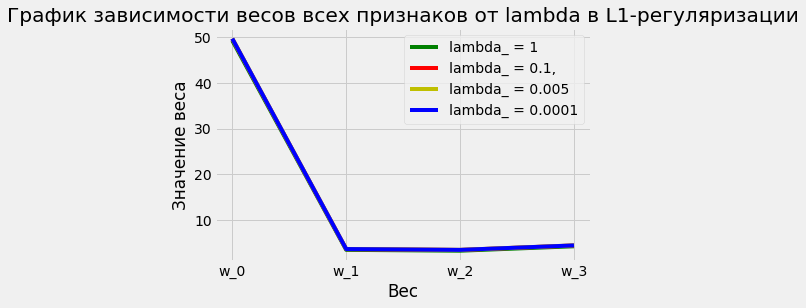

In [221]:
# Нарисуем график зависимости весов всех признаков от lambda в L1-регуляризации (на данных из урока)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6, 4))
color = ["g","r","y","b"]
label = ["lambda_ = 1", "lambda_ = 0.1,", "lambda_ = 0.005", "lambda_ = 0.0001"]
for i in range(4):
    plt.plot(W_all_1.loc[i], color = color[i], label=label[i])
    plt.xlabel('Вес')
    plt.ylabel('Значение веса')
    plt.title("График зависимости весов всех признаков от lambda в L1-регуляризации")
    plt.legend()

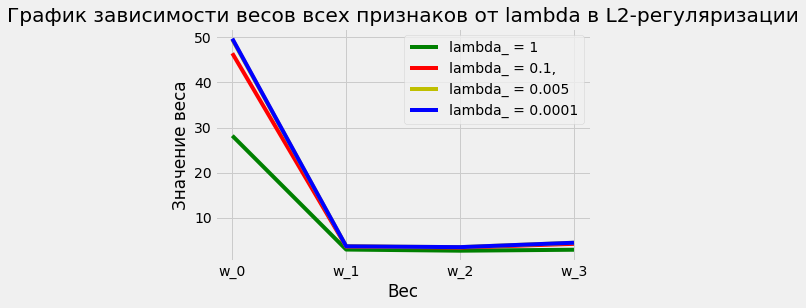

In [216]:
# Нарисуем график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6, 4))
color = ["g","r","y","b"]
label = ["lambda_ = 1", "lambda_ = 0.1,", "lambda_ = 0.005", "lambda_ = 0.0001"]
for i in range(4):
    plt.plot(W_all_2.loc[i], color = color[i], label=label[i])
    plt.xlabel('Вес')
    plt.ylabel('Значение веса')
    plt.title("График зависимости весов всех признаков от lambda в L2-регуляризации")
    plt.legend()

##### Вывод:
На существующем наборе данных мы не видим существенного отличия на графиках изменение весов признаков от lambda в L1-регуляризаци, как это наблюдается при L2 регуляризации. 

### 5. *Постройте графики зависимости весов двух признаков (стаж и стоимость занятия) от количества итераций для градиентного спуска и для стохастического градиентного спуска (на данных из урока).

In [117]:
n = X.shape[1]
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000]])
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]    # средний балл ЕГЭ (целевая переменная)

In [61]:
# Стандартизируем признаки
X_st = X.copy()
X_st = X_st.astype(np.float64)

for i in range(1, 3):
    X_st[i] = (X_st[i] - X_st[i].mean()) / X_st[i].std()

In [62]:
def eval_model_GD(X, y, iterations, lambda_, alpha=1e-4):
    W_all_GD = []
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * 1/n * 2 * np.dot(X, (np.dot(W, X) - y)))
        W_all_GD.append(list(W[[1, 2]]))
    return W_all_GD

In [63]:
# Метод стохастического градиентного спуска (mini-batch SGD)
def eval_model_SGD(X, y, iterations, qty_in_batch, alpha=1e-4):
    np.random.seed(42)
    W_all_SGD = []
    W = np.random.randn(X.shape[0]) # начальное приближение весов
    n = X.shape[1] # число наблюдений
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T))
            W_all_SGD.append(list(W[[1, 2]]))
    return W_all_SGD

In [149]:
def mserror(X, w, y_pred):
    y = X.T.dot(w)
    return (sum((y - y_pred)**2)) / len(y)
# инициализируем начальный вектор весов
w = np.zeros(X.shape[0])
# список векторов весов после каждой итерации
w_list = []
# список значений ошибок после каждой итерации
errors = []
# шаг градиентного спуска
eta = 5e-2
# максимальное число итераций
max_iter = 1e6
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-4
# зададим начальную разницу весов большим числом
weight_dist = np.inf
# счетчик итераций
iter_num = 0
np.random.seed(1234)
W_all_SGD_2 = []
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[1])
    new_w = w - 2 * eta * np.dot(X_st[:,train_ind], (np.dot(X_st[:,train_ind], w) - y[train_ind])) / X.shape[1]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    w_list.append(new_w.copy())
    errors.append(mserror(X_st, new_w, y))
    iter_num += 1
    w = new_w
#     if iter_num % 50 == 0:
    W_all_SGD_2.append(list(w[[1, 2]]))
    
w_list = np.array(w_list)
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')
print(f'Количество итераций - {iter_num}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 44.4301
Количество итераций - 5289


In [143]:
# Получим коэффициенты для градиентого спуска на разных итерациях
W_all_GD = eval_model_GD(X_st, y, iterations=5000, alpha=1e-3, lambda_= 0.001)
W_all_GD = pd.DataFrame(W_all_GD, columns = ("w_1", "w_2"))

In [144]:
# Получим коэффициенты для стохастического градиентого спуска с батчами на разных итерациях
W_all_SGD = eval_model_SGD(X_st, y, iterations=5000, qty_in_batch = 2, alpha=1e-3)
W_all_SGD = pd.DataFrame(W_all_SGD, columns = ("w_1", "w_2"))

In [155]:
# Получим коэффициенты для классического стохастического градиентого спуска на разных итерациях
W_all_SGD_2 = pd.DataFrame(W_all_SGD_2, columns = ("w_1", "w_2"))

<Figure size 432x288 with 0 Axes>

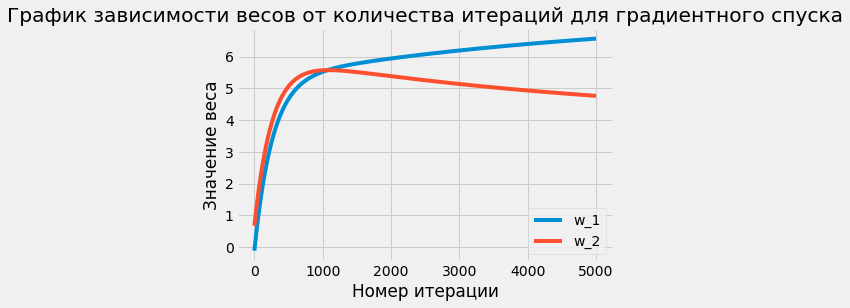

In [145]:
# Построим график для градиентого спуска на разных итерациях
plt.style.use('fivethirtyeight');
plt.figure(figsize=(6, 4));
W_all_GD.plot();
plt.xlabel('Номер итерации');
plt.ylabel('Значение веса');
plt.title("График зависимости весов от количества итераций для градиентного спуска");

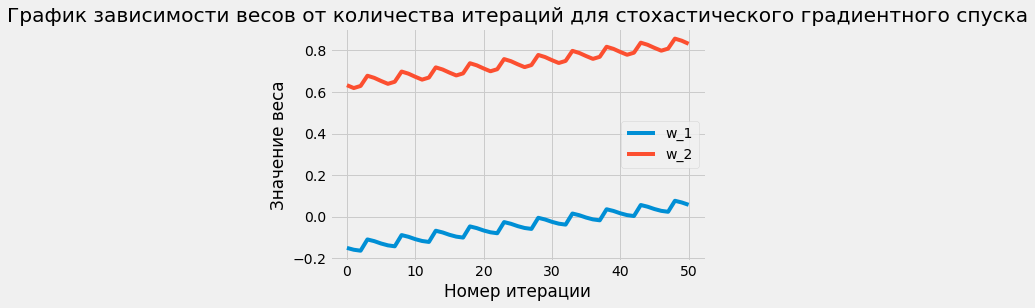

In [156]:
# Построим график для стохастического градиентого спуска с батчами на разных итерациях
W_all_SGD.loc[:50].plot();
plt.xlabel('Номер итерации')
plt.ylabel('Значение веса')
plt.title("График зависимости весов от количества итераций для стохастического градиентного спуска");

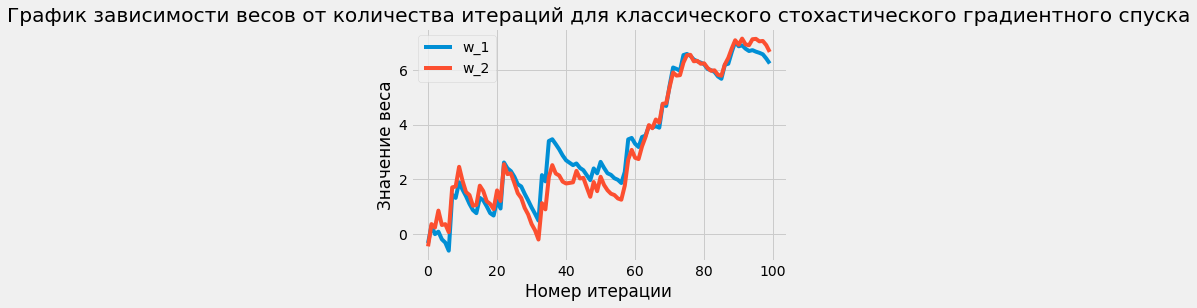

In [162]:
# Построим график для классическтго стохастического градиентого спуска на разных итерациях (првые 100 итераций)
W_all_SGD_2[["w_1", "w_2"]][:100].plot();
plt.xlabel('Номер итерации')
plt.ylabel('Значение веса')
plt.title("График зависимости весов от количества итераций для классического стохастического градиентного спуска");

##### Вывод:
Видим, что при стохастическом градиентном спуске изменения весов носят неровный характер, в отличие от простого градиетого спуска